In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
X=data.iloc[:,:-1]
Y=data['output']

In [6]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [8]:
ordered_Rank_Features=SelectKBest(score_func=chi2,k=13)
ordered_features=ordered_Rank_Features.fit(X,Y)

In [9]:
ordered_features.scores_.shape

(13,)

In [10]:
dfscores=pd.DataFrame(ordered_features.scores_,columns=['Score'])
dfcolumns=pd.DataFrame(X.columns)

In [11]:
feature_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [12]:
feature_rank.columns=['Features','Scores']
feature_rank

,Features,Scores
0,age,23.286624
1,sex,7.576835
2,cp,62.598098
3,trtbps,14.823925
4,chol,23.936394
5,fbs,0.202934
6,restecg,2.978271
7,thalachh,188.320472
8,exng,38.914377
9,oldpeak,72.644253


In [13]:
feature_rank.nlargest(13,columns='Scores')

,Features,Scores
7,thalachh,188.320472
9,oldpeak,72.644253
11,caa,66.440765
2,cp,62.598098
8,exng,38.914377
4,chol,23.936394
0,age,23.286624
3,trtbps,14.823925
10,slp,9.804095
1,sex,7.576835


In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [15]:
print(model.feature_importances_)

[0.06855633 0.05352769 0.12412276 0.0618609  0.06161812 0.01928233
 0.03311478 0.09283096 0.11143569 0.08038266 0.07285209 0.1222751
 0.09814061]


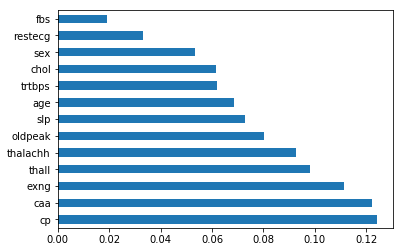

In [16]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(13).plot(kind="barh")
plt.show()

In [17]:
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


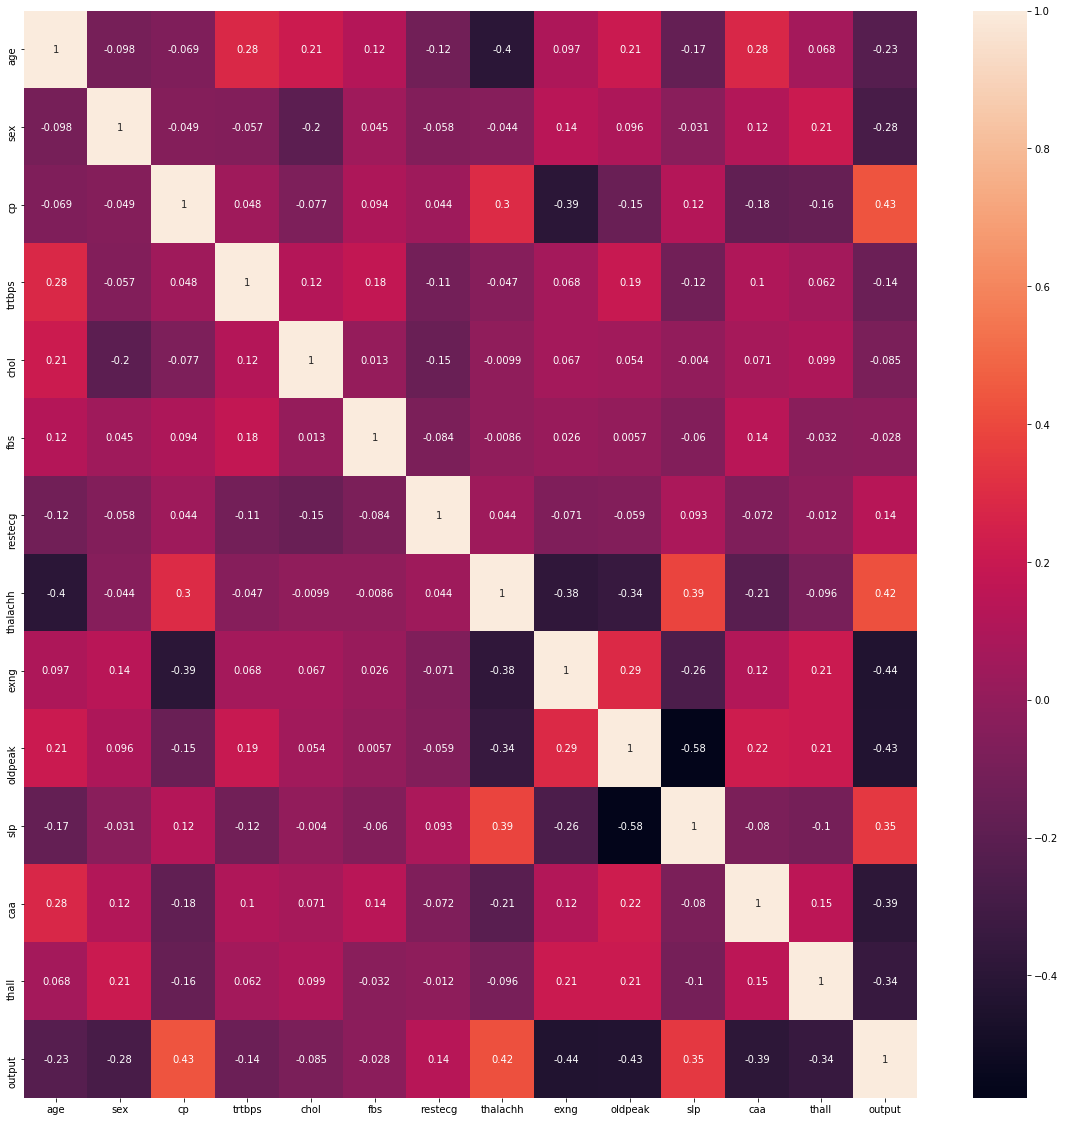

In [18]:
import seaborn as sns
corr=data.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_features].corr(),annot=True)
plt.show()

In [20]:
def correlation(dataset,threshold):
    colset=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i][j])>threshold:
                colname=corr_matrix.columns[i]
                colset.add(colname)
    return colset

In [21]:
threshold=0.3
correlation(data.iloc[:,:-1],threshold)

{'slp'}

In [22]:
from sklearn.feature_selection import mutual_info_classif
mutul_info=mutual_info_classif(X,Y)

In [23]:
mutual_Data=pd.Series(mutul_info,index=X.columns)
mutual_Data.sort_values(ascending=False)

thall       0.139242
cp          0.132724
oldpeak     0.122240
caa         0.110375
exng        0.099997
restecg     0.099767
chol        0.069120
thalachh    0.064377
sex         0.053574
slp         0.033590
age         0.001282
fbs         0.000000
trtbps      0.000000
dtype: float64

In [24]:
X=X.drop(['restecg','fbs','trtbps'],axis=1)

In [25]:
import evalml

2021-08-10 20:11:36,182 featuretools - WARNING    Featuretools failed to load plugin nlp_primitives from library nlp_primitives. For a full stack trace, set logging to debug.


In [26]:
X_train,X_test,y_train,y_test=evalml.preprocessing.split_data(X.values,Y.values,problem_type="binary")

In [27]:
from evalml import AutoMLSearch

In [28]:
automl=AutoMLSearch(X_train=X_train,y_train=y_train,problem_type="binary",max_batches=1)

Generating pipelines to search over...


In [29]:
automl.search()

*****************************
* Beginning pipeline search *
*****************************

Optimizing for Log Loss Binary. 
Lower score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: xgboost, random_forest, decision_tree, extra_trees, linear_model, catboost, lightgbm



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Batch 1: (1/9) Mode Baseline Binary Classification P... Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 15.699
Batch 1: (2/9) Decision Tree Classifier w/ Imputer      Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 8.240
High coefficient of variation (cv >= 0.2) within cross validation scores. Decision Tree Classifier w/ Imputer may not perform as estimated on unseen data.
Batch 1: (3/9) LightGBM Classifier w/ Imputer           Elapsed:00:01
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.475
High coefficient of variation (cv >= 0.2) within cross validation scores. LightGBM Classifier w/ Imputer may not perform as estimated on unseen data.
Batch 1: (4/9) Extra Trees Classifier w/ Imputer        Elapsed:00:02
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.399
Batch 1: (5/9) Elastic Net Classifier w/ Imputer + S... Elapsed:00:04
	Startin

In [30]:
best_pipeline=automl.best_pipeline

In [31]:
automl.rankings

,id,pipeline_name,score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,3,Extra Trees Classifier w/ Imputer,0.398627,0.346075,97.460839,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,7,Random Forest Classifier w/ Imputer,0.420221,0.386761,97.323292,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,8,Logistic Regression Classifier w/ Imputer + St...,0.442105,0.347489,97.183894,True,{'Imputer': {'categorical_impute_strategy': 'm...
3,2,LightGBM Classifier w/ Imputer,0.474975,0.393366,96.974519,True,{'Imputer': {'categorical_impute_strategy': 'm...
4,6,XGBoost Classifier w/ Imputer,0.510221,0.389693,96.750009,True,{'Imputer': {'categorical_impute_strategy': 'm...
5,5,CatBoost Classifier w/ Imputer,0.634342,0.631814,95.959387,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,4,Elastic Net Classifier w/ Imputer + Standard S...,0.689334,0.689963,95.609102,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,1,Decision Tree Classifier w/ Imputer,8.239934,7.351919,47.513537,True,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,15.699161,15.777337,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [32]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])

*************************************
* Extra Trees Classifier w/ Imputer *
*************************************

Problem Type: binary
Model Family: Extra Trees

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Extra Trees Classifier
	 * n_estimators : 100
	 * max_features : auto
	 * max_depth : 6
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 2.0 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary  Sensitivity at Low Alert Rates # Training # Validation
0                      0.346       0.751 0.943      0.886 0.886                     0.876            0.877                           0.429    161.000       81.000
1                      0.365       0.701 0.924 

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X.values,Y.values,test_size=0.25,random_state=50)

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier(n_estimators=100,max_features='auto',max_depth=6,min_samples_split=2,min_weight_fraction_leaf=0.0,n_jobs=-1)

In [35]:
model.fit(X_train,y_train)

ExtraTreesClassifier(max_depth=6, n_jobs=-1)

In [36]:
from sklearn import metrics
print("Accuracy")
print( metrics.accuracy_score(y_test, model.predict(X_test)) )

Accuracy
0.8157894736842105


In [38]:
y_pred= model.predict(X_test)

### Confusion matrix

In [39]:
from sklearn.metrics import confusion_matrix
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()

print('Confusion Matrix for TFIDF W2V: ')
print("True Negative (TN) ",tn)
print("False Positive (FP) ",fp)
print("False Negative (FN) ",fn)
print("True Positive (TP) ",tp)

Confusion Matrix for TFIDF W2V: 
True Negative (TN)  23
False Positive (FP)  10
False Negative (FN)  4
True Positive (TP)  39


(2.5, -0.5)

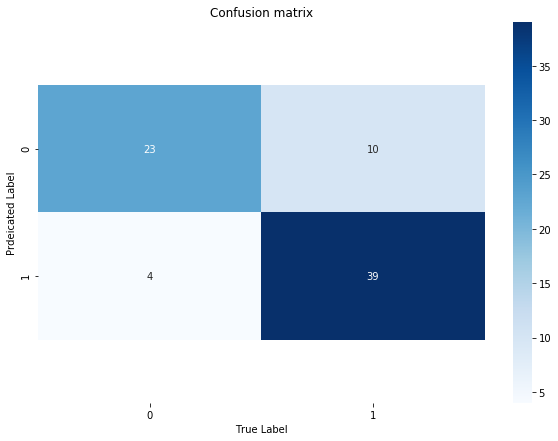

In [41]:
import seaborn as sns
conf_matrix_bow=[[tn,fp],[fn,tp]]
plt.figure(figsize=(10,7))
ax=sns.heatmap(conf_matrix_bow,annot=True,fmt='d',cmap='Blues')
plt.xlabel("True Label")
plt.ylabel("Prdeicated Label")
plt.title("Confusion matrix")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)